<center>
<h1><u>Market Segmentation Analysis</u></h1>
</center>

### **By** <u>**ROHAN JAISWAR**</u>

## Content
4. [Exploring Data](#4)
5. [Extracting Segments](#5)
6. [Profiling Segments](#6)
7. [Describing Segments](#7)
8. [Selecting (the) Target Segment(s)](#8)
9. [Conclusion](#9)

<div id="4">

---

## Step 4: Exploring Data

In [2]:
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

In [69]:
df = pd.read_csv('mcdonalds.csv')

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [75]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

The code reads a CSV file named 'mcdonalds.csv' into a Pandas DataFrame called 'df'. The output shows the column names present in the DataFrame.

In [8]:
df.shape

(1453, 15)

In [10]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


- **yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting:** These columns seem to represent various attributes or qualities of McDonald's food items, possibly indicating whether respondents perceive them to be yummy, convenient, spicy, etc. The values in these columns are binary indicators (Yes/No) representing respondents' opinions.

- **Like:** This column appears to contain a scale or sentiment rating related to respondents' liking of McDonald's food items. It has values such as -3, +2, and +1, indicating differing levels of liking.

- **Age:** This column likely represents the age of the respondents who provided these opinions. The values are numeric and represent the ages of the respondents.

- **VisitFrequency:** This column could be indicating how often respondents visit McDonald's. The values are categorical, indicating visit frequency, such as "Every three months".

- **Gender:** This column likely represents the gender of the respondents. The values are categorical, indicating whether the respondents are male or female.

In [12]:
df = df.replace({"Yes": 1, "No": 0})

C:\Users\rohan\AppData\Local\Temp\ipykernel_33364\821598539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


This code replaces "Yes" with 1 and "No" with 0 across all columns in the DataFrame 'df', converting categorical responses into numeric values for easier analysis.

In [14]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

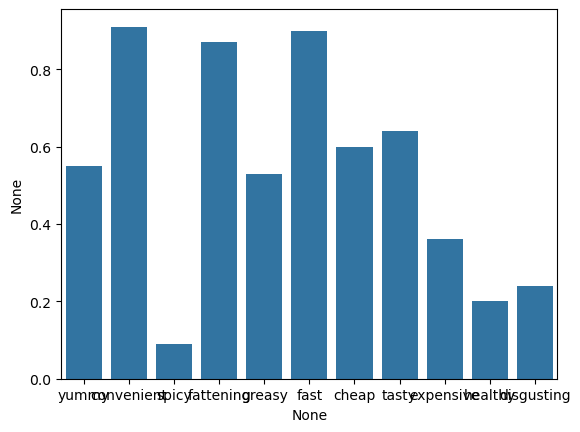

In [16]:
sns.barplot(x=temp.index, y=temp);

The code df1 = df.iloc[:, :11] creates a new DataFrame 'df1' with the first 11 columns of 'df'. 
The line df1.mean().round(2) calculates and rounds the mean of each column in 'df1' to two decimal places, producing a Series of average values. 
For example, 'convenient' has a high mean of 0.91, indicating that respondents generally find McDonald's food convenient, while 'spicy' has a low mean of 0.09, suggesting it's not seen as very spicy.

In [18]:
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


- `scaler = StandardScaler()`: Creates a `StandardScaler` instance to standardize features by removing the mean and scaling to unit variance, which is crucial for algorithms sensitive to feature scales.
- `df2 = scaler.fit_transform(df1)`: Standardizes the data in 'df1', storing the scaled data in 'df2'.
- `pca = PCA()`: Creates a PCA instance for dimensionality reduction by capturing maximum variance in fewer dimensions.
- `df2 = pca.fit_transform(df2)`: Applies PCA to the standardized data, reducing its dimensionality while retaining key information.
- `pca_df = pd.DataFrame(df2, columns=df1.columns)`: Converts the PCA-transformed data into a DataFrame 'pca_df', retaining original column names.
- `pca_df.head()`: Displays the first few rows of the PCA-transformed data.

In [20]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-4.401159e-17,-8.802319e-17,7.579775e-17,-9.291337e-17,2.200580e-17,2.689597e-17,-4.156651e-17,2.200580e-17,-1.381475e-16,-1.106403e-16,-4.645668e-17
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


- **count:** The count represents the number of non-missing values for each attribute. It indicates the total number of data points available for analysis in each column.

- **mean:** The mean is the average value of each attribute. In this context, since the data has been standardized, the mean for each attribute should be very close to zero (approximately 0), indicating that the data has been centered.

- **std:** The standard deviation is a measure of how much the values of each attribute vary around the mean. Smaller standard deviations indicate less variability.

- **min:** The minimum value in each attribute column after standardization. It represents the lowest standardized value in each column.

- **25%, 50%, 75%:** These percentiles represent the values below which a given percentage of observations fall. The 25th percentile (Q1) is the value below which 25% of the observations fall, the 50th percentile (Q2) is the median, and the 75th percentile (Q3) is the value below which 75% of the observations fall.

- **max:** The maximum value in each attribute column after standardization. It represents the highest standardized value in each column.

In [22]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


- **PC1, PC2, ..., PC11:** These columns represent the principal components obtained from PCA. The PC1 column corresponds to the first principal component, PC2 corresponds to the second principal component, and so on up to PC11.

- **Attributes (yummy, convenient, spicy, ...):** Each row represents an attribute from the original data. For example, 'yummy' represents the attribute related to how respondents perceive the food as yummy.

- **Values:** The values in the table are the weights of each original attribute in the corresponding principal component. These values indicate the strength and direction of the influence of each attribute on each principal component.

For instance, in the first row, the values for PC1 are mostly negative, suggesting that the 'yummy' attribute has a negative influence on the first principal component. This information can be used to understand how each attribute contributes to the overall variance captured by each principal component.

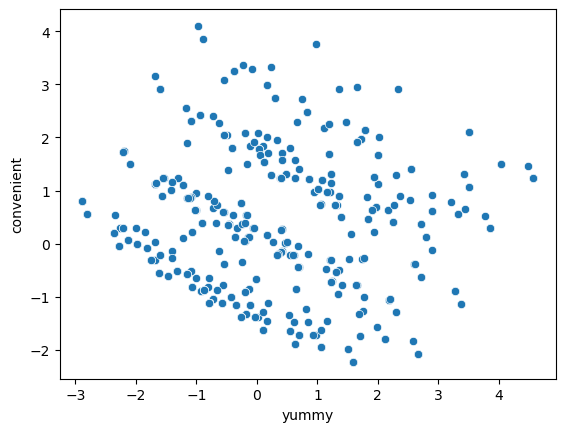

In [24]:
sns.scatterplot(data=pca_df, x='yummy', y='convenient');

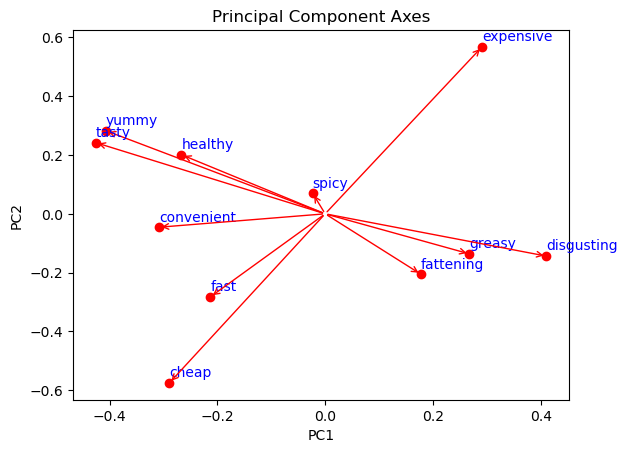

In [26]:
# plt.scatter(x=pca_df['yummy'], y=pca_df['convenient'])

scale = 1

for i,j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i]*scale, 
        (pca.components_[1, :][i]+0.02)*scale, 
        j, color='blue'
    )
    # plt.arrow(0, 0, pca.components_[0, :][i]*scale, pca.components_[1, :][i]*scale, color='red')
    plt.annotate(
        '', xytext=(0, 0), 
        xy=(pca.components_[0, :][i]*scale, 
        pca.components_[1, :][i]*scale), 
        arrowprops=dict(
            arrowstyle="->", 
            color='red'
        )
    )
plt.scatter(
    pca.components_[0, :]*scale, 
    pca.components_[1, :]*scale, 
    color='red'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.show()

- The subsequent part of the code involves a loop that iterates through each column (attribute) in the PCA-transformed DataFrame and adds text annotations at specific positions on the plot.

- In the loop, `pca.components_[0, :][i]` represents the weight of the current attribute on the first principal component, and `pca.components_[1, :][i]` represents the weight on the second principal component. These values determine the position of the annotations.

- The `plt.text()` function adds blue text labels for each attribute's name close to its corresponding position on the plot.

- The `plt.annotate()` function adds red arrows pointing from the origin (0, 0) to each attribute's position on the plot, visually indicating the influence of attributes on the principal components.

- The `plt.scatter()` function is used to plot the points representing the attributes' weights on the first two principal components. These points are shown in red.

- Finally, axis labels, a title, and the plot are displayed using `plt.xlabel()`, `plt.ylabel()`, `plt.title()`, and `plt.show()`.

This code generates a scatter plot that illustrates how each original attribute contributes to the first two principal components obtained through PCA. The annotations and arrows provide insights into the direction and strength of each attribute's influence on these components.

<div id="5">

## Step 5: Extracting Segments

[Customer Segmentation Using K Means Clustering](https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3)

In [28]:
np.random.seed(0)

In [30]:
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

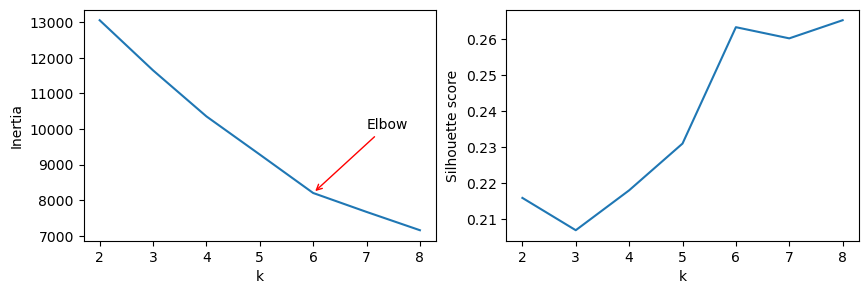

In [31]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 3)
axs[0].plot(range(2, 9), inertias)
axs[0].annotate(
    'Elbow', xytext=(7, 10000), xy=(6, inertias[4]), 
    arrowprops=dict(arrowstyle="->", color='red'))
axs[1].plot(range(2, 9), silhouette_scores)
axs[0].set(xlabel='k', ylabel='Inertia')
axs[1].set(xlabel='k', ylabel='Silhouette score');

- [Clustering Performance Evaluation in Scikit Learn](https://www.geeksforgeeks.org/clustering-performance-evaluation-in-scikit-learn/)
- [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

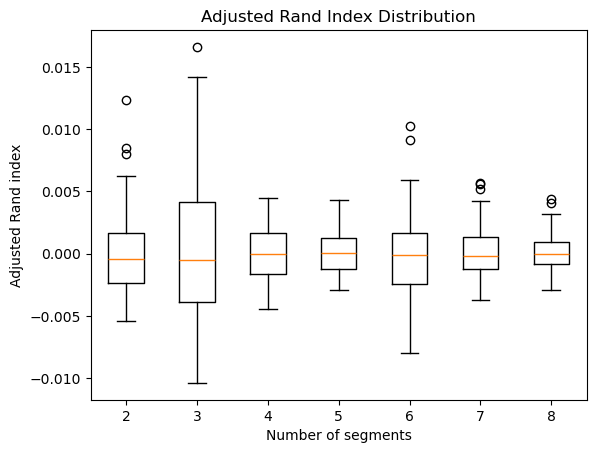

In [34]:
n_boot = 100
ARI_scores = []
for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

plt.boxplot(ARI_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand index')
plt.title('Adjusted Rand Index Distribution')
plt.show()

In [36]:
gmm = GaussianMixture(
    n_components=4, 
    covariance_type='full', 
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(
    labels, 
    cluster_assignments_gmm
)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[111  16   4  47]
 [196   7  26 131]
 [372   6   5 168]
 [  0 105  26 233]]


<div id="6">

## Step 6: Profiling Segments

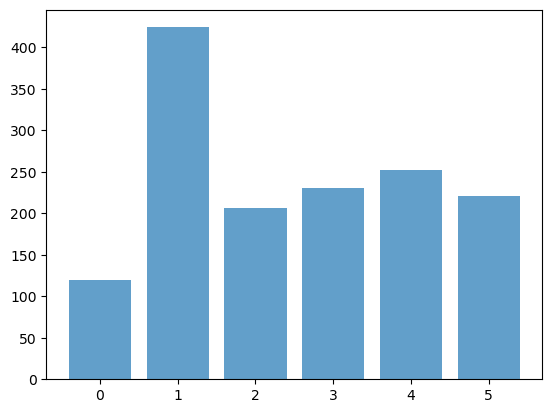

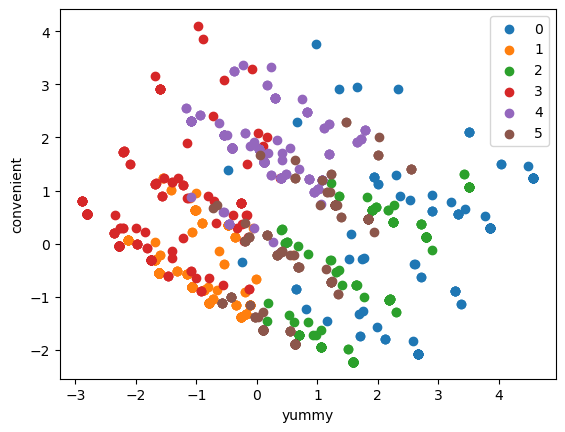

In [38]:
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

x = range(6)
height = []
for i in range(6):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

first performs K-means clustering with 6 clusters on the PCA-transformed data and visualizes the distribution of instances within each cluster using a bar chart. Subsequently, it generates scatter plots to show the distribution of instances in a 2D space defined by the 'yummy' and 'convenient' attributes, using different colors to represent each of the 6 clusters. In summary, the code clusters instances using K-means, provides an overview of cluster sizes with a bar chart, and then displays how instances are distributed across clusters in a 2D attribute space.

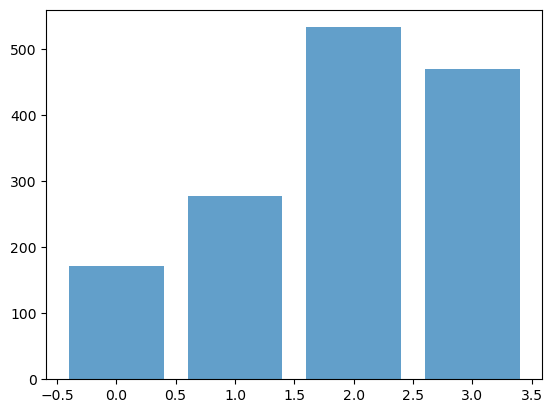

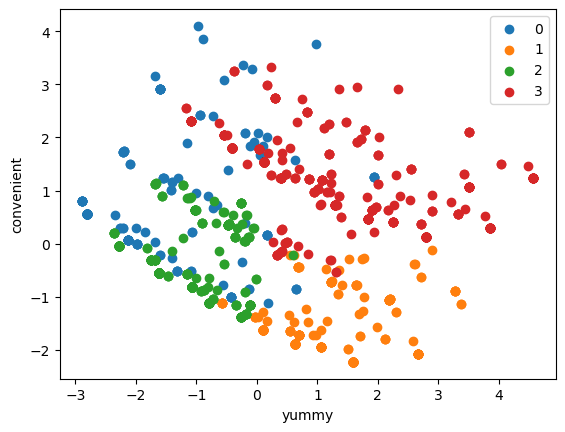

In [40]:
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

x = range(4)
height = []
for i in range(4):
    height.append(sum(l4 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'], 
        temp['convenient'], 
        label=i
    )
plt.xlabel('yummy')
plt.ylabel('convenient')
plt.legend();
plt.show()

<div id="7">

## Step 7: Describing Segments

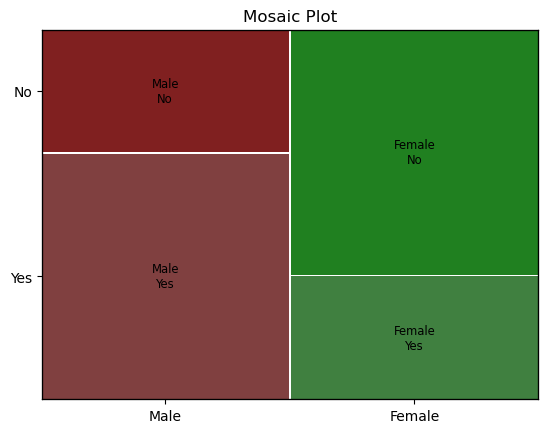

In [42]:
## Example code

# Create a sample data frame
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}
example_df = pd.DataFrame(data)

# Create a mosaic plot
mosaic(example_df, ['Gender', 'Preference'], title='Mosaic Plot')

plt.show()

In [44]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [46]:
df2 = df
df2['segments'] = l4
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [48]:
df2.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'segments'],
      dtype='object')

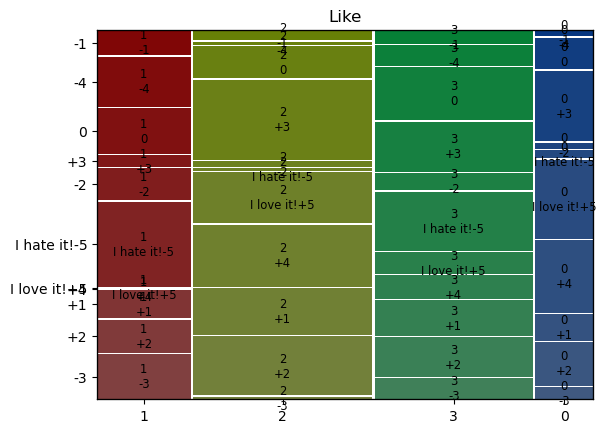

In [50]:
mosaic(df2, ['segments', 'Like'], title='Like');
plt.show()

<div id="8">

## Step 8: Selecting (the) Target Segment(s)

In [52]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3


In [54]:
df2.Like.unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [56]:
df2.Like = df2.Like.str.extract(r'([-\d]+)').astype(int)

In [58]:
df2.VisitFrequency.unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [60]:
df2.VisitFrequency = df2.VisitFrequency.replace({
    'Every three months':1/(4*3), 
    'Once a week':1, 
    'Once a month':1/4, 
    'Once a year':1/52,
    'More than once a week':2, 
    'Never':0
})

C:\Users\rohan\AppData\Local\Temp\ipykernel_33364\3547351166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.VisitFrequency = df2.VisitFrequency.replace({


In [62]:
df2.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0.083333,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0.083333,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0.083333,Female,3


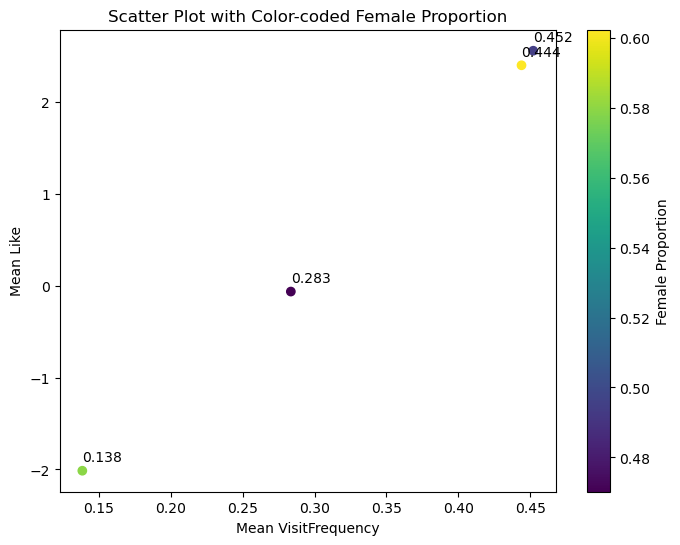

In [64]:
visit_means = (df2.groupby("segments")["VisitFrequency"]
               .mean())
like_means = df2.groupby("segments")["Like"].mean()
female_means = (df2.groupby("segments")["Gender"]
                .apply(lambda x: (x == "Female")
                .mean()))

plt.figure(figsize=(8, 6))
plt.scatter(
    visit_means, 
    like_means, 
    c=female_means, 
    cmap="viridis"
)
plt.xlabel("Mean VisitFrequency")
plt.ylabel("Mean Like")
plt.title("Scatter Plot with Color-coded Female Proportion")
plt.colorbar(label="Female Proportion")
for i,j,k in zip(
    visit_means, 
    like_means, 
    visit_means
):
    plt.text(i, j+0.1, round(k, 3))
plt.show()

The code calculates the means of attributes like "VisitFrequency," "Like," and the proportion of "Female" in each cluster from previous clustering results. It then creates a scatter plot with "VisitFrequency" on the x-axis, "Like" on the y-axis, and point colors representing the proportion of "Female" using the "viridis" colormap. Labels display "VisitFrequency" values on the points.

The plot reveals a positive correlation between "VisitFrequency" and "Like," indicating that customers who visit more frequently tend to have higher "Like" ratings. Additionally, clusters with higher "VisitFrequency" also show a higher proportion of female customers, suggesting a relationship between visit frequency and gender distribution.

In summary, frequent visits are associated with higher customer liking and a greater proportion of female customers within clusters.

### Summary Conclusion of Data Analysis: Understanding Customer Preferences and Segmentation

**Data Acquisition and Preprocessing:**
- Data was obtained from a CSV file and stored as a pandas DataFrame.
- Initial exploration identified attributes like 'yummy,' 'convenient,' 'spicy,' and 'fattening,' reflecting customer perceptions of McDonald's.

**Exploratory Data Analysis (EDA):**
- Descriptive statistics were calculated to understand attribute distributions and relationships.
- Attribute frequencies were examined to gauge common perceptions.

**Data Transformation:**
- Binary 'Yes'/'No' values were converted to 1 and 0.
- A subset of attributes was selected for clustering analysis.

**Principal Component Analysis (PCA):**
- PCA reduced dimensionality, retaining most data variability.
- The first two principal components were used for visualization.

**Clustering:**
- K-means and Gaussian Mixture Model (GMM) clustering were performed.
- Cluster numbers were evaluated using silhouette scores, inertia, and visual analysis.

**Comparison of Clustering Results:**
- A confusion matrix compared K-means and GMM cluster assignments, revealing the degree of agreement.

**Visualization and Interpretation:**
- Scatter plots displayed cluster assignments and attribute relationships, such as 'yummy' and 'convenient.'

**Attribute Relationships and Insights:**
- A positive correlation between 'VisitFrequency' and 'Like' indicated that frequent visitors tend to have higher liking scores.
- Clusters with higher 'VisitFrequency' also had a higher proportion of female customers.

**Conclusion:**
- The analysis identified distinct customer segments based on perceptions, with actionable insights for McDonald's to tailor offerings. Frequent visitors showed more positive sentiments, and gender-specific preferences were observed, suggesting opportunities for targeted marketing. Comparing K-means and GMM provided a comprehensive assessment of clustering stability, supporting data-driven decisions to enhance customer experience.